<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Spring 20 midterm, Section 7</div>
<div style="text-align: right">Dino Konstantopoulos, 26 February 2020</div>
<div style="text-align: right">100 points total</div>

# INFO 6105 Spring 20 Midterm

You have up to an hour. There is a *lot* of coding in this midterm. It is meant to simulate a real interview so you are *pressed for time*. Be mindful what you spend your time working on. Good luck!

>**NO CHEATING**: If you cheat by emailing or messaging during the midterm (and we can see you from behind), we will close your laptop and ask you to leave in front of everyone, you *will* get an F for the midterm, and have a nice little chat with director Kal. You are only allowed to browse, not to communicate in any shape or form, via email, messaging, or posting. Also, you are not allowed to post or share this midterm with anyone, not now, nor in the future. The other section is taking the midterm *after* spring break.

<div style="text-align: right">50 points</div>

# 1. Blackjack

[Blackjack](https://en.wikipedia.org/wiki/Blackjack) is the American version of a popular global banking game known as **Twenty-One**, whose relatives include *Pontoon* and *Vingt-et-Un*. It is a comparing card game between one or more players and a dealer, where each player in turn competes against the dealer. Players do not compete against each other, they compete against the dealer. It is played with one or more decks of 52 cards, and is the *most widely played casino banking game in the world*.

<br />
<center>
<img src = images/bj.jpg width = 500 />
</center>

Players are each dealt two cards, face up or down depending on the casino and the table. In the U.S., the dealer is also dealt two cards, normally one up (exposed) and one down (hidden). In most other countries, the dealer only receives one card face up. The value of cards two through ten is their pip value (2 through 10). Face cards (Jack, Queen, and King) are all worth ten. Aces can be worth one *or* eleven. A hand's value is the sum of the card values. Players are allowed to draw additional cards to improve their hands. A hand with an ace valued as 11 is called "*soft*", meaning that the hand will not bust by taking an additional card. The value of the ace will become one to prevent the hand from exceeding 21.

<br />
<center>
<img src = images/bj.webp width = 300 />
</center>

Once all the players have completed their hands, it is the dealer's turn. The dealer hand will not be completed if all players have either busted or received *blackjacks* (=21). The dealer then reveals the hidden card and must hit (draw another card) until the cards total up to 17 points. At 17 points or higher the dealer *must* stay (at most tables the dealer also hits on a "*soft*" 17, i.e. a hand containing an ace and one or more other cards totaling six). You are betting that you have a better hand than the dealer. The better hand is the hand where the sum of the card values is closer to 21 without exceeding 21. The detailed outcome of the hand follows:

- If the player is dealt an Ace and a ten-value card (called a "*blackjack*" or "*natural*"), and the dealer does not, the player wins and usually receives a bonus.
- If the player exceeds a sum of 21 ("*busts*"); the player loses, even if the dealer also exceeds 21.
- If the dealer exceeds 21 ("*busts*") and the player does not; the player wins.
- If the player attains a final sum higher than the dealer and does not bust; the player wins.
- If both dealer and player receive a blackjack or any other hands with the same sum, called a "*push*", *no one* wins.

Here's a game of blackjack in code:

In [54]:
from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]
# 方块（Diamond）红、红桃（Heart）、黑桃（Spade）、梅花（Club）

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(deck, ownedCards):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = ownedCards
    blackjack = False
    user_input = 'y'
    
    if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
        blackjack = True;
        user_input = 'n'
        
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random() * len(deck))
        
        # Give card
        print ( deck[position])
        table_cards.append(deck[position][0])
        del deck[position]

        # gain blackjack
        if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
            blackjack = True;
            break
            
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        # user_input = raw_input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        user_input = choice(['y', 'n'])
    if  blackjack == True:
        print ("Congratulations! Your hit the Blackjack !")
        return 0
    else: 
        print ("Your score is: %d" % calculate_score(table_cards))
        # Return the round total score
        return calculate_score(table_cards)


def game():
    # Define an empty deck
    deck = []
    
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['player 1', 'player 2']

    max_score = -1
    winner = None
    blackjacklist = []
    
    player1OwnedCards = []
    player2OwnedCards = []
    position = int(random() * len(deck))
    print ('player1_show:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random() * len(deck))
    print ('player1_hidden:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    
    position = int(random() * len(deck))
    print ('player2_show:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random() * len(deck))
    print ('player2_hidden:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    
    # run the game one time per player
    for count, player in enumerate(players):
        print ("\n%s, your turn starts now!" % player)
        ownedCards = []
        if player == 'player 1':
            ownedCards = player1OwnedCards
        else:
            ownedCards = player2OwnedCards
        score = play_turn(deck, ownedCards)
        # We add lucky dog to the blackjacklist
        if score == 0 :
            blackjacklist.append(player);
            winner = player
            continue
        # If the player exceeds a sum of 21 ("busts"); the player loses, even if the dealer also exceeds 21.
        elif score > 21 and count == 0:
            winner = 'player 2'
            break
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        elif 21 >= score > max_score:
            max_score = score
            winner = player
        elif score == max_score:
            Winner = 'None'

    if not blackjacklist:
        print ("Winner is %s" % winner)
    elif len(blackjacklist) == 2 or winner == 'None':
        print ('Push, no winner.')
    else:
        print ("Winner is %s" % blackjacklist[0])
    

Go ahead, play a game of blackjack:

In [79]:
game()

player1_show: ('10', 'heart')
player1_hidden: ('4', 'heart')
player2_show: ('9', 'spades')
player2_hidden: ('5', 'diamonds')

player 1, your turn starts now!
('8', 'heart')
Your score is: 22
Winner is player 2


### Question 1
Now, *modify* the code above to follow the *american* rules of blackjack described above, so that player 1 is **you** and player 2 is the **dealer**. You have to modify the code *above*, not any other package.


### See the answer given above

### Question 2
*Then*, adopt this simple strategy:
- If your hand ≥ 18, 'stick' with a probability of 80%, else 'hit' with a probability of 80%. 

This isn’t an amazing policy but it is simple and you will still be able to win some games. Now, do a Monte Carlo simulation of this strategy and figure out its winning **Expectation** (by playing through thousands of games).

In [115]:
import random

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]
# 方块（Diamond）红、红桃（Heart）、黑桃（Spade）、梅花（Club）

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total

# the strategy---------------------------------------------------------------------
def strategy(situation):
    choiceList = ['y', 'n']
    if situation == 'less':
        probabilities = [0.8, 0.2]
    else:
        probabilities = [0.2, 0.8]
    x = random.uniform(0,1)
    cumulative_probability=0.0
    for item,item_probability in zip(choiceList, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability:
            break
    return item
# the strategy---------------------------------------------------------------------


def play_turn(deck, ownedCards):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = ownedCards
    blackjack = False
    user_input = 'y'
    
    if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
        blackjack = True;
        user_input = 'n'
    
    if calculate_score(table_cards) < 18:
        user_input = strategy('less')
        # print('input1', user_input)
    else:
        user_input = strategy('greater')
        # print('input2', user_input)
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random.random() * len(deck))
        
        # Give card
        # print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]

        # print(table_cards)
        # gain blackjack
        if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
            blackjack = True;
            break
            
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        # user_input = raw_input('Do you want another card? (Y)')
        # Here we pick 'y' or 'n' using strategy:--------------------------------
        if calculate_score(table_cards) < 18:
            user_input = strategy('less')
        else:
            user_input = strategy('greater')
        # Here we pick 'y' or 'n' using strategy:--------------------------------
    
    if  blackjack == True:
        # print ("Congratulations! Your hit the Blackjack !")
        return 0
    else: 
        totalScore = calculate_score(table_cards)
        # print ("Your score is: %d" % totalScore)
        # Return the round total score
        return totalScore


def game():
    # Define an empty deck
    deck = []
    
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['player 1', 'player 2']

    max_score = -1
    winner = None
    blackjacklist = []
    
    
    player1OwnedCards = []
    player2OwnedCards = []
    position = int(random.random() * len(deck))
    # print ('player1_show:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random.random() * len(deck))
    # print ('player1_hidden:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    
    position = int(random.random() * len(deck))
    # print ('player2_show:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random.random() * len(deck))
    # print ('player2_hidden:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    
    
    # run the game one time per player
    for count, player in enumerate(players):
        # print ("\n%s, your turn starts now!" % player)
        ownedCards = []
        if player == 'player 1':
            ownedCards = player1OwnedCards
        else:
            ownedCards = player2OwnedCards
        score = play_turn(deck, ownedCards)
        # We add lucky dog to the blackjacklist
        if score == 0 :
            blackjacklist.append(player);
            winner = player
            continue
        # If the player exceeds a sum of 21 ("busts"); the player loses, even if the dealer also exceeds 21.
        elif score > 21 and count == 0:
            winner = 'player 2'
            break
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        elif 21 >= score > max_score:
            max_score = score
            winner = player
        elif score == max_score:
            winner = 'Push'

    if not blackjacklist:
        return winner
        #print ("Winner is %s" % winner)
    elif len(blackjacklist) == 2 or winner == 'Push':
        return 'Push'
        #print ('Push, no winner.')
    else:
        return blackjacklist[0]
        #print ("Winner is %s" % blackjacklist[0])
    

In [116]:
game()

'player 2'

In [121]:
def MonteCarloSimulation():
    j = 0
    for i in range(0,10000):
        if(game() == 'player 1'):
            j += 1
    return (j/10000)

In [122]:
winningExpectation = MonteCarloSimulation()
print ("Winning Expectation based on this strategy is %s" % winningExpectation)

Winning Expectation based on this strategy is 0.426


### Winning Expectation based on this strategy is 42.6%

### Question 3
Now let's say that you want to know the value of holding a hand of 15 while the dealer is showing, let's say, a 10. This is an example of a **prediction** problem. Each time the agent carries out action A in state S for the first time in that game, it will calculate the reward of the game from that point onwards. By doing this, you can determine how valuable it is to be in that current state.

Suppose you run this Monte Carlo simulation many times and you come up with the followind strategy table:

<br />
<center>
<img src = images/strategy.png width = 500 />
</center>

Now *implement* this strategy in code, run a Monte Carlo simulation, and compare the winning percentage with the previous strategy. `S` is **stick** (*no more cards, please*), `H` is **hit** (*please give me another card Mr. Dealer*), and assume `D` is **hit** as well. Which is a better strategy and by how much?

In [171]:
import random

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]
# 方块（Diamond）红、红桃（Heart）、黑桃（Spade）、梅花（Club）

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total

# the strategyForDealer---------------------------------------------------------------------
def strategyForDealer(situation):
    choiceList = ['y', 'n']
    if situation == 'less':
        probabilities = [0.8, 0.2]
    else:
        probabilities = [0.2, 0.8]
    x = random.uniform(0,1)
    cumulative_probability=0.0
    for item,item_probability in zip(choiceList, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability:
            break
    return item
# the strategyForDealer---------------------------------------------------------------------

# the strategyForUser---------------------------------------------------------------------
def strategyForUser(currentScore, dealerShowingCard):
    # print('here1', currentScore)
    # print('here2', dealerShowingCard)
    trueValue = card_value[dealerShowingCard]
    action = ''
    if currentScore > 12 :
        if trueValue < 7:
            action = 'n'
        elif trueValue > 6:
            action = 'y'
    elif currentScore == 12 :
        if 3 < trueValue < 7:
            action = 'n'
        else:
            action = 'y'
    return action
# the strategyForUser---------------------------------------------------------------------

def play_turn(deck, ownedCards, dealerShowingCard, player):
    # print('***', ownedCards,'***', dealerShowingCard,'***', player)
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = ownedCards
    blackjack = False
    user_input = 'y'
    
    if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
        blackjack = True;
        user_input = 'n'
        
    # Here we pick 'y' or 'n' using strategy:--------------------------------
    if player == 0:
        if calculate_score(table_cards) < 12:
            user_input = 'y'
        elif 11 < calculate_score(table_cards) < 17:
            currentScore = calculate_score(table_cards)
            user_input = strategyForUser(currentScore, dealerShowingCard)
        else:
            user_input = 'n'
    elif player == 1:
        if calculate_score(table_cards) < 18:
            user_input = strategyForDealer('less')
        # print('input1', user_input)
        else:
            user_input = strategyForDealer('greater')
        # print('input2', user_input)
    # Here we pick 'y' or 'n' using strategy:--------------------------------
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random.random() * len(deck))
        
        # Give card
        # print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]

        # print(table_cards)
        # gain blackjack
        if 'A' in table_cards and ('10' in table_cards or 'J' in table_cards or 'Q' in table_cards or 'K' in table_cards):
            blackjack = True;
            break
            
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        # user_input = raw_input('Do you want another card? (Y)')
        
        # Here we pick 'y' or 'n' using strategy:--------------------------------
        if player == 0:
            if calculate_score(table_cards) < 9:
                user_input = 'y'
            elif 8 < calculate_score(table_cards) < 17:
                currentScore = calculate_score(table_cards)
                user_input = strategyForUser(currentScore, dealerShowingCard)
            else:
                user_input = 'n'
        elif player == 1:
            if calculate_score(table_cards) < 18:
                user_input = strategyForDealer('less')
            # print('input1', user_input)
            else:
                user_input = strategyForDealer('greater')
            # print('input2', user_input)
        # Here we pick 'y' or 'n' using strategy:--------------------------------
    
    if  blackjack == True:
        # print ("Congratulations! Your hit the Blackjack !")
        return 0
    else: 
        totalScore = calculate_score(table_cards)
        # print ("Your score is: %d" % totalScore)
        # Return the round total score
        return totalScore


def game():
    # Define an empty deck
    deck = []
    
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['player 1', 'player 2']

    max_score = -1
    winner = None
    blackjacklist = []
    
    
    player1OwnedCards = []
    player2OwnedCards = []
    position = int(random.random() * len(deck))
    # print ('player1_show:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random.random() * len(deck))
    # print ('player1_hidden:', deck[position])
    player1OwnedCards.append(deck[position][0])
    del deck[position]
    
    position = int(random.random() * len(deck))
    # print ('player2_show:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    position = int(random.random() * len(deck))
    # print ('player2_hidden:', deck[position])
    player2OwnedCards.append(deck[position][0])
    del deck[position]
    
    
    # run the game one time per player
    for count, player in enumerate(players):
        # print ("\n%s, your turn starts now!" % player)
        ownedCards = []
        dealerShowingCard = player2OwnedCards[0]
        if player == 'player 1':
            ownedCards = player1OwnedCards
        else:
            ownedCards = player2OwnedCards
        score = play_turn(deck, ownedCards, dealerShowingCard, count)
        # We add lucky dog to the blackjacklist
        if score == 0 :
            blackjacklist.append(player);
            winner = player
            continue
        # If the player exceeds a sum of 21 ("busts"); the player loses, even if the dealer also exceeds 21.
        elif score > 21 and count == 0:
            winner = 'player 2'
            break
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        elif 21 >= score > max_score:
            max_score = score
            winner = player
        elif score == max_score:
            winner = 'Push'

    if not blackjacklist:
        return winner
        #print ("Winner is %s" % winner)
    elif len(blackjacklist) == 2 or winner == 'Push':
        return 'Push'
        #print ('Push, no winner.')
    else:
        return blackjacklist[0]
        #print ("Winner is %s" % blackjacklist[0])

In [172]:
game()

'player 1'

In [173]:
def MonteCarloSimulation():
    j = 0
    for i in range(0,10000):
        if(game() == 'player 1'):
            j += 1
    return (j/10000)

In [174]:
winningExpectation = MonteCarloSimulation()
print ("Winning Expectation based on this strategy is %s" % winningExpectation)

Winning Expectation based on this strategy is 0.5065


## With the new strategy , the winning expectation become 50.06% , we improve it by 8%! that's a huge improvemnt!

<div style="text-align: right">50 points</div>

# 2. Fair or Crooked?

We have a coin and we don't know if it's fair or not. Let's see if it's **fair**, with a little bit of help from Data Science! We will compute a **p-value**, but using **Bayesian estimation** instead of a t-test! This is a ***real*** test statistic, where we visit parallel universes, but we use real Bayesian simulations instead of assuming that the data is *pretty* or that we have a Student-T distribution.

<br />
<center>
<img src = images/coin-toss.jpg width = 300 />
</center>

So we toss the coin a thousand times and record the following tosses: 

In [2]:
alltosses = '''TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTT
HTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHH
THTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTT
TTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHT
HTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTH
HHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHH
TTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHH
HHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHT
HHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTHH'''

Use this cell to remove carriage returns:

In [3]:
alltosses = alltosses.replace('\n', '')
alltosses 

'TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTTHTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHHTHTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTTTTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHTHTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTHHHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHHTTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHHHHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHTHHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTH

For the remainder of the problem, let's assume that `T` is modelled as a `0`, and `H` as a `1`.

### Question 1

Based on the `alltosses` roll above, what is the frequency for each side of the coin? Write this down in the cell below in the form of a `pandas` Series, then a `pandas` dataframe. 

Call `sides` your pandas series, and `toss_df` your pandas dataframe.

>**HINT**: Use a python `Counter` to get `T` and `H` frequencies.
```(python)
import pandas as pd
from collections import Counter
sides = pd.Series(...
```

In [6]:
import pandas as pd
from collections import Counter
sides = pd.Series(list(alltosses))
frequenciesOfTH = Counter(sides)
frequenciesOfTH

Counter({'T': 484, 'H': 516})

In [7]:
import pandas as pd
from collections import Counter
frequenciesOfTH = pd.Series(Counter(list(alltosses)))
frequenciesOfTH

T    484
H    516
dtype: int64

Now plot the histogram.

In [8]:
plt.hist(sides)

NameError: name 'plt' is not defined

{'T': 0.484, 'H': 0.516}


<BarContainer object of 2 artists>

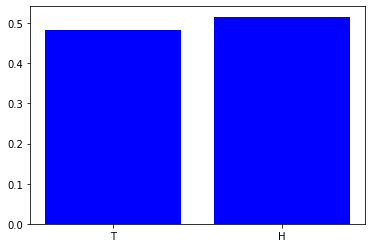

In [9]:
import matplotlib.pyplot as plt
import numpy as np
class ProbDist(dict):
    """A Probability Distribution; an {outcome: probability} mapping."""
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs) ## 转换成dictionary
        ## print ('ProbDist', self);
        # Make probabilities sum to 1.0; assert no negative probabilities
        total = sum(self.values())
        for outcome in self:
            if self[outcome] == 0:
                self[outcome] = 0
            else:
                self[outcome] = self[outcome] / total
                assert self[outcome] >= 0

sides_probability = ProbDist(dict(frequenciesOfTH))
print (sides_probability)
plt.bar(sides_probability.keys(), sides_probability.values(), color='b')

In [11]:
frequenciesOfTH_df = pd.DataFrame.from_dict(frequenciesOfTH)
frequenciesOfTH_df

,0
T,484
H,516


What statistical probability density profile might you match this distribution with?

Answer: Bernoulli distribution

Now we ask ourselves: What is the probability of seeing results like this by ***chance***?

### Question 2: Hypothesis testing: Is the apparent effect real, or is it due to chance?  

To answer that question, we formulate two hypotheses: the **null hypothesis H0** is a model of the tosses if the histogram above is due to ***chance***. The **alternate hypothesis HA** is a model of a **crooked** (unfair) coin.

Ideally we should compute the probability of seeing a this empirical histogram effect $E$ under ***both*** hypotheses; that is $P(E \;|\; H0)$ and $P(E \;|\; \text{HA})$.  But formulating $HA$ is not always easy, so in conventional hypothesis testing, we just compute $P(E \;|\; H0)$, which is the **p-value**.  

If the p-value is ***small***, we conclude that our somewhat skewed histogram is unlikely to have occurred by chance, which suggests that the coin is **crooked**.

#### Step 1: Build the null hypothesis
The first step is to get data from our observations and compute a test statistic. The result is some measure of the size of the effect, or **delta**. For example, if we were comparing the mean of two groups, delta is the **difference in the means**. Since we are comparing actual values with expected values, delta is a **chi-squared** statistic: a measure of the distance between the observed and expected values.

#### Step 2: Build a model
The next step is to build a model from our empirical observations and generate simulated data. Then we'll apply the test statistic to the simulated data.

#### Step 3: How many times does the test statistic for the simulated data *exceed the delta*?
The last step is the easiest: Count how many times the test statistic for the simulated data exceeds the delta from the null hypothesis simulation. That's the **p-value**!

To compute a p-value, we have to choose a test statistic that measures how *unexpected* the histogram above is.  The **chi-squared** statistic is a reasonable choice: for each coinc toss we compare the expected frequency and the observed frequency and compute the sum of the squared relative differences.

We have 2 sides to the coin, thus we expect the following frequency for each toss:

In [25]:
len(alltosses)/2

500.0

In [26]:
observed_tosses = [x for x in alltosses]
observed_tosses[:10]

['T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H']

Use a **list comprehension** to get a list of numbers, either 0 or 1, representing our observations. use 0 for `T` and ` for `H`:

In [27]:
def convert(pattern):
    if pattern == 'T':
        return 0
    else:
        return 1
observed_tosses_bin = [convert(x) for x in alltosses]
observed_tosses_bin[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

Now we define a **Chi squared** statistic to measure the difference between an expected distribution and an observed one:

In [28]:
def ChiSquared(observed, expected):
    total = 0
    for obs in observed:
        total += obs
    return np.abs(total - expected)

ChiSquared(observed_tosses_bin, len(alltosses)/2)

16.0

For the observed frequencies, the chi-squared statistic is 16.  By itself, this number doesn't mean anything.  We have to ***compare it*** to results from the **null hypothesis**.

We may also need a chi statistic to compare draws from the null hypothesis with draws from the alternate hypothesis. Here it is:

In [29]:
def ChiSquared2(observed, expected):
    total = 0
    both = zip(observed, expected)
    for obs, exp in zip(observed, expected):
        total += np.abs(obs - exp)
    return total

Now we need code that generates *simulated* data. Let's do Bayesian estimation to simulate data with the same statistics as our empirical observations, and then also write a null hypothesis (fair data) simulator.

In the pymc3 simulation below, you will pick your data likelihood function from a list of statistical functions (pdfs). Make sure you pick the right one. My symbol for this function is `???`. Pick the right one and import it from `pymc3`.

In Bayesian estimation, we *also* assign pdfs to the parameter(s). Use the [logistic]() function to assign a pdf to the first parameter of your ??? distribution, and a Normal distribution to the parameter itself. That is a very common practice for any binary variable in ML. We will use a large standard deviation (10) because we have no idea what the parametes should be. 

In [30]:
from pymc3 import Model, Normal, Binomial
import theano.tensor as T

def logistic(l):
    return 1 / (1 + T.exp(-l))

with Model() as toss_model:
    mu = Normal('mu', mu=0, sd=10)
    
with toss_model:
    toss_like = Binomial('toss_like', p=logistic(mu), n=1000, observed=observed_tosses_bin)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


And now we find a solution for `mu` using pymc3. We run for 1,000 timesteps and we hope we converge!

In [31]:
RANDOM_SEED = 42

In [32]:
from pymc3 import fit

with toss_model: 
    toss_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 57,544: 100%|██████████| 10000/10000 [00:03<00:00, 3235.76it/s]   
Finished [100%]: Average Loss = 57,420


We now plot the posterior distribution for `mu` in order to find its most likely value (the mean of the posterior):

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


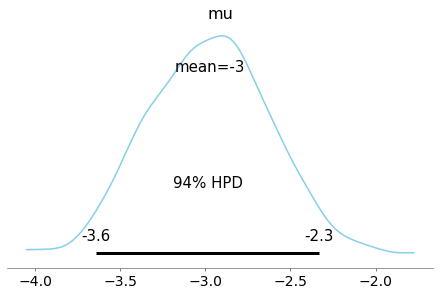

In [33]:
from pymc3 import plot_posterior

plot_posterior(toss_trace[100:], 
                varnames=['mu'],
                color='#87ceeb');

In [34]:
1 / (1 + np.exp(0.076))

0.48100914005407436

Now plot the *simulated* (fake) distribution of coin tosses, based on the statistics of the observed coin tosses. Make sure to import the *same* likelihood pdf you used from pymc3, but this time import it from `scipy.stats.distributions` (note: the captialization of the distribution in scipy may be different):

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


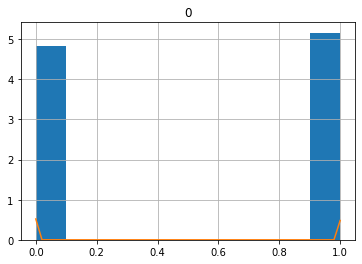

In [35]:
from scipy.stats.distributions import bernoulli
import numpy as np

mu_posterior_mean = 1 / (1 + np.exp(0.076))

pd.DataFrame(observed_tosses_bin).hist(normed=True)
plt.plot(np.linspace(0, 1), bernoulli.pmf(np.linspace(0, 1), mu_posterior_mean))

Does it match the observed distribution?

If it does, we are now ready to simulate, i.e. generate fake coin tosses. This is called **generating posterior predictive checks**:

Posterior predictive checks (PPCs) *validate* your model: You generate data from the model using parameters from draws from the posterior. The `samples` parameter is how many of these simulations you want to run.

Here is one way of doing it (deprecated):

In [36]:
from pymc3 import sample_ppc

with toss_model:
    toss_ppc = sample_ppc(toss_trace, samples=1)

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  after removing the cwd from sys.path.
/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 33.09it/s]


Here is another way (the preferred one):

In [37]:
from pymc3 import sample_posterior_predictive
ppc = sample_posterior_predictive(toss_trace, samples=1, model=toss_model)

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 440.16it/s]


In [152]:
toss_ppc['toss_like'].shape

(1, 1000)

In [38]:
simulated_tosses = toss_ppc['toss_like'][0]
simulated_tosses[:20]

array([63, 83, 59, 70, 57, 87, 65, 75, 73, 64, 75, 72, 68, 73, 78, 60, 72,
       81, 62, 67])

In [39]:
faketosses = ''.join([str(int(x)) for x in simulated_tosses])
faketosses

'638359705787657573647572687378607281626781787666546470827365716874578672737779805782646378656575575960748846597470686075656265677577737568627970736581748570725561666577708585846374736365887656607479666383736358696963656962577383515966719384667763748075756267577573505873786676676068687769615857685660608169757374796872767069757765717066505753726855816168857261695082615973758170616372806169677159766074658072685371746958666977638382627274757370817365567984537368657874775770667263667563847381797479736977636464597461806986676175715273625660696867627073757458756554617781687663786572668066786468696466827877747161697375836467747570616385688456786873785768627762616566675277626073856472567060737269566876686363566857708673707171777363756974616867717070847669616959777269766896666373597580746967696572867671728285707672667482557886757564688069827679777158686772796677657451855858867374806677737288656452855477736358709374566560647064705882666660718182828766877181826260896969636569706279637665647867786

In [40]:
len(faketosses)

2001

Now we can simulate our coin (i,e. simulate similar statistics to our heart's content):

In [41]:
def SimulateAlternateHypothesisCoin():
    with toss_model:
        toss_ppc = sample_ppc(toss_trace, samples=1)
    simulated_tosses = toss_ppc['toss_like'][0]
    return ''.join([str(int(x)) for x in simulated_tosses])

And... find a way to simulate a **fair** coin so you get results in the same shape here below:

In [42]:
from random import randrange

def SimulateNullHypothesisCoin(length):
    tosses = ''
    for i in range(length):
        x = np.random.binomial(n=1,p=0.5)
        if x == 0:
            tosses += '0'
        else:
            tosses += '1'
    return tosses

In [43]:
SimulateNullHypothesisCoin(1000)

'100101111100010011101010011111000111010010000111111101101100011110101110101110010010000101011011110101000010101101000110100000001111001010001100000101001000110011001110000010101010100101011001011100100110000011010011010111101001110000110110100001010100101111010000001010000111111111111010010100100110100011011110011000010001001011011010100010101010011100100010100110101111110010001101010010101000111010100011100100011000011010111001100010000001100110010001000000010110001101001001001100100011101001010001100010100110101111111111110000111011111100011010011000110111100100011001100010110100111010011111011001010101100111010001011010101011011000101010101101000100010011110011100010101111100101101101110010010100110111011111000111100101111110011101110100011100000111011001110110010010111111000110110011100100111001000010011111111101101001000011011000001000110000100100010000100110110011101110100110001100110111110111101011011110011000110110110010101010010111011111001110111111010001000101101010110100111

In [44]:
Counter(SimulateNullHypothesisCoin(1000))

Counter({'1': 512, '0': 488})

How many `H`s do we get from the alternate hypothesis simulation, and from the null hypothesis simulation?

In [45]:
Counter(SimulateAlternateHypothesisCoin())['1']

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<00:00, 552.54it/s]


94

In [46]:
Counter(SimulateNullHypothesisCoin(1000))['1']

496

Now, we know that the expected frequency for each toss for a fair coin is 1000/2 = 500. This is how we can compare observation to null hypothesis. Although we may want to conclude that the p-value is low with the test below, ***there is still a possibility we got this result by chance***:

In [47]:
expected = 1000/2
threshold = ChiSquared(observed_tosses_bin, expected)
threshold

16.0

This is for a null hypothesis simulation:

In [199]:
expected = 1000/2
null_hypothesis_sim = SimulateNullHypothesisCoin(1000)
null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
chi2

4.0

Let's get a p-value where we compare null hypothesis simulations to our empirical data:

In [200]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000/2.

# observed statistic:
threshold = ChiSquared(observed_tosses_bin, expected)
print(threshold)

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
    if chi2 >= threshold:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

16.0
p-value 0.351


If the the p-value is high, higher than the usual 95% Confidence interval, you cannot reject the null hypothesis!

But our empirical experiment (real observations) threshold could very well have been generated ***by chance***!

Here is a much more powerful and conclusive estimation of our **p-value**: We run a lot of null experiments ***and*** a lot of alternative hypothesis experiments, using our Bayesian model (instead of a single observation as above)! And we can ***count*** all times that our null experiment deviates from the expected threshold (*that is the null chi statistic*), and the times that our alternate hypothesis experiment deviates from the expected threshold (*that is the alternate hypothesis chi statistic*), and we can compare the two chi statistics! 

That tells us in how many universes we observe distributions *different* from the null hypothesis, and allows us to generate a *real* probability that our alternate hypothesis simulations (matching our empirical data) **statistically differ** from null hypothesis simulations!

If the p-value is ***small***, you may conclude that the effect is ***unlikely to have occurred by chance***, which suggests that it is ***real***: The coin is crooked. If the p-value is ***high***, you cannot dismiss the null hypothesis and you need to conclude that the coin is fair and any skew in the statistics is due to *chance*.

In [201]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000 / 2.

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi_null = ChiSquared(null_hypothesis_sim_bin, expected)
    
    alternate_hypothesis_sim = SimulateAlternateHypothesisCoin()
    alternate_hypothesis_sim_bin = [int(x) for x in alternate_hypothesis_sim]
    chi_alternate = ChiSquared(alternate_hypothesis_sim_bin, expected)

    if chi_null >= chi_alternate:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

/Users/CYH/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<00:00, 775.14it/s]


100%|██████████| 1/1 [00:00<00:00, 810.96it/s]


100%|██████████| 1/1 [00:00<00:00, 722.53it/s]


p-value 0.0


If your p-value is low, there is a *very small* possibility these skewed results are due to chance, so our coin is ***crooked***. If it's high, you cannot conclude and need to accept the null hypothesis.

So, which is it?

That's **hypothesis testing** in a nutshell. All of the classical frequentist tests you learn in classical (non-pythonized and MCMC-ized) statistics class are just ways to compute p-values *efficiently* when computation was expensive. Now that computation is fast and clever algorithms like Metropolis and NUTS are available, Bayesian estimation is the *preferred* way to do statistics, even to compute something like a p-value!